In [1]:
import datetime
from datetime import timedelta
from collections import OrderedDict

import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool

start_date = datetime.datetime(2016,1,1)
day_count = 960
days = []
for single_date in (start_date + timedelta(n) for n in range(day_count)):
    days.append(
        str(single_date.year)
        +"/"+"{:02}".format(single_date.month)
        +"/"+"{:02}".format(single_date.day))
maps = OrderedDict(zip(days, np.zeros([day_count, 360, 180, 4])))

In [2]:
files = glob("data/AIS_clean/*")
files = sorted([file for file in files if not '~' in file])
file = np.random.choice(files)
print(file)
df = pd.read_csv(file, index_col=0)
df.head().append(df.tail())

data/AIS_clean/fix_ais_bulk_9510199.csv


,X,Y,Cos,Sin,Speed,DWT
2016/01/01,320.406325,91.989402,-0.938170,0.344319,0.652692,0.606867
2016/01/02,322.980497,88.012870,-0.632986,0.709260,0.678182,0.606867
2016/01/03,327.339943,84.691403,-0.602337,0.783202,0.655000,0.606867
2016/01/04,331.108463,80.923043,-0.754931,0.563529,0.688000,0.606867
2016/01/05,331.765597,76.334230,-0.803965,-0.095498,0.667170,0.606867
2018/08/13,282.358603,81.076785,0.544097,-0.838808,0.622576,0.606867
2018/08/14,278.267822,83.798114,0.546110,-0.837562,0.625263,0.606867
2018/08/15,273.951995,86.684167,0.545780,-0.837517,0.601364,0.606867
2018/08/16,270.226273,89.179306,0.548223,-0.836177,0.595417,0.606867
2018/08/17,266.053444,91.979000,0.545751,-0.836208,0.539333,0.606867


In [3]:
def f(file):
    df = pd.read_csv(file, index_col=0)
    for index, row in df.iterrows():
        try:
            x, y = int(row['X']), int(row['Y'])
            maps[index][x, y, 0] = row['Cos']
            maps[index][x, y, 1] = row['Sin']
            maps[index][x, y, 2] = row['Speed']
            maps[index][x, y, 3] = row['DWT']
        except:
            print(file, index)

In [4]:
for file in tqdm(files):
    f(file)

100%|██████████| 930/930 [01:04<00:00, 34.89it/s]


In [6]:
color = sorted(np.random.choice([0,1,2,3], 3, replace=False))
color

[0, 2, 3]

2017/04/29
2017/04/30
2017/05/01
2017/05/02
2017/05/03
2017/05/04
2017/05/05
2017/05/06
2017/05/07
2017/05/08
2017/05/09
2017/05/10
2017/05/11
2017/05/12
2017/05/13
2017/05/14
2017/05/15
2017/05/16
2017/05/17
2017/05/18
2017/05/19


/home/nama/.pyenv/versions/3.6.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2017/05/20
2017/05/21
2017/05/22
2017/05/23
2017/05/24
2017/05/25
2017/05/26
2017/05/27
2017/05/28


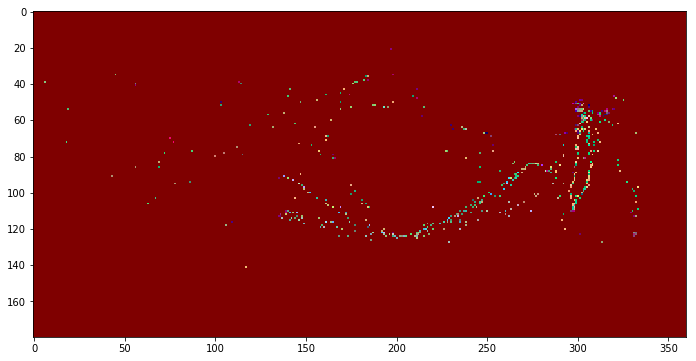

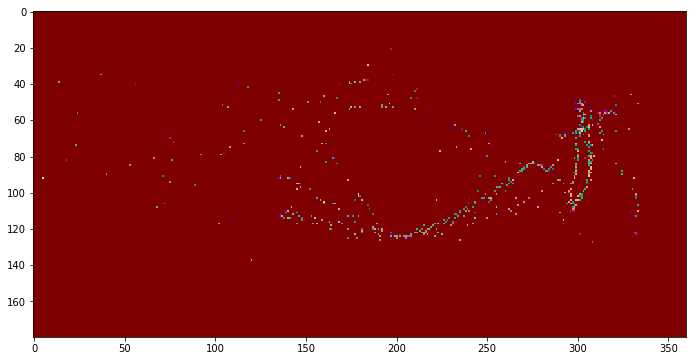

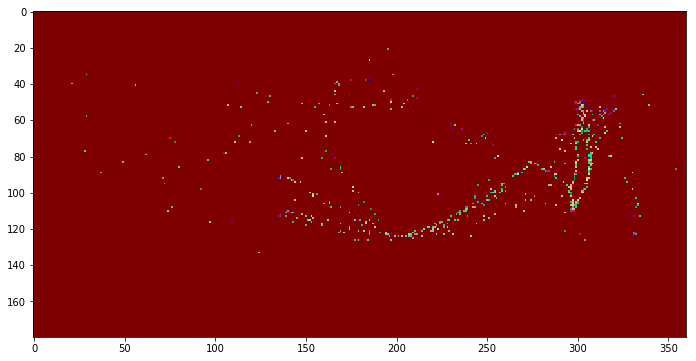

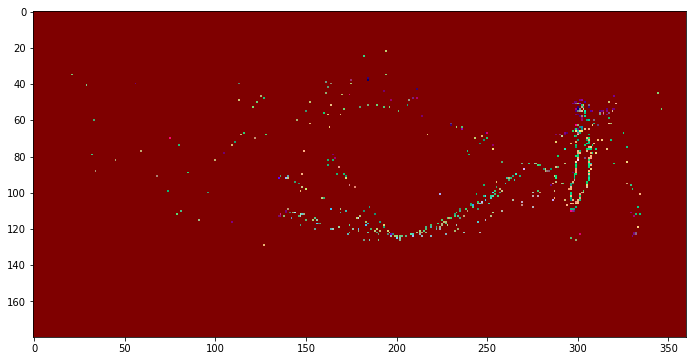

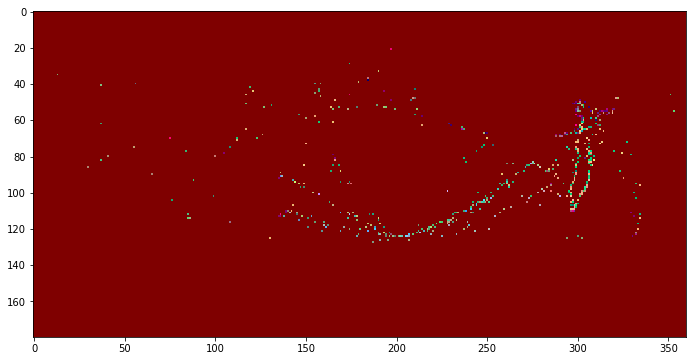

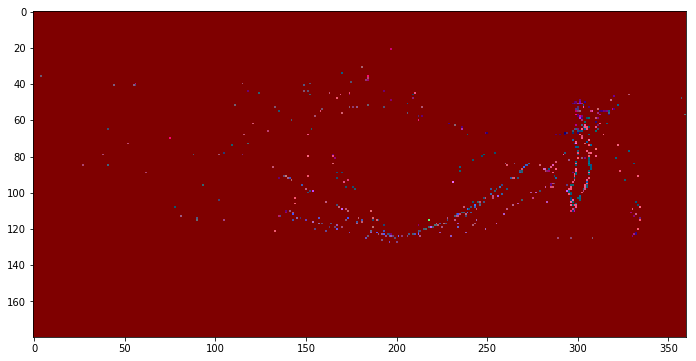

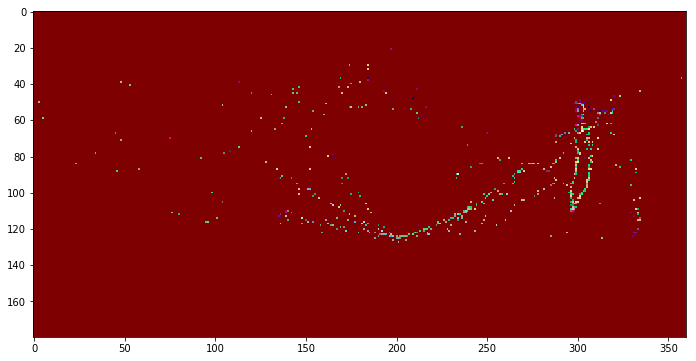

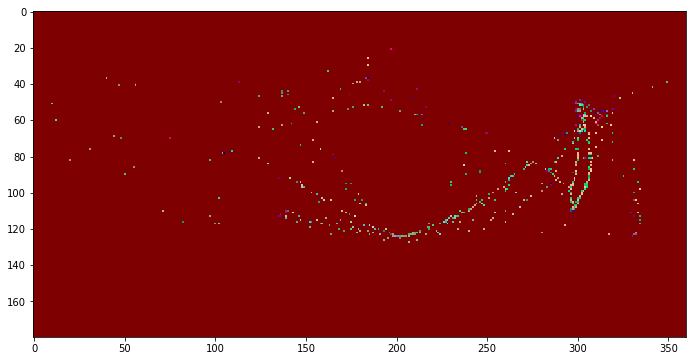

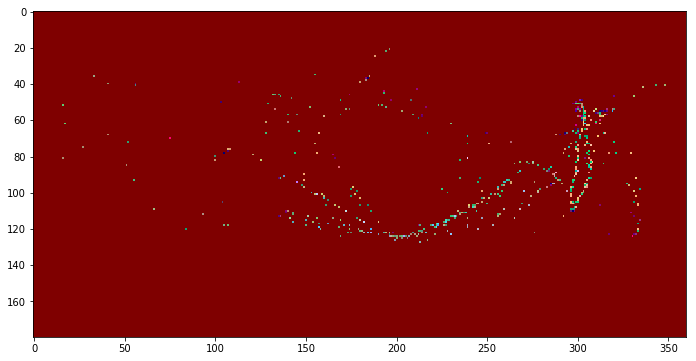

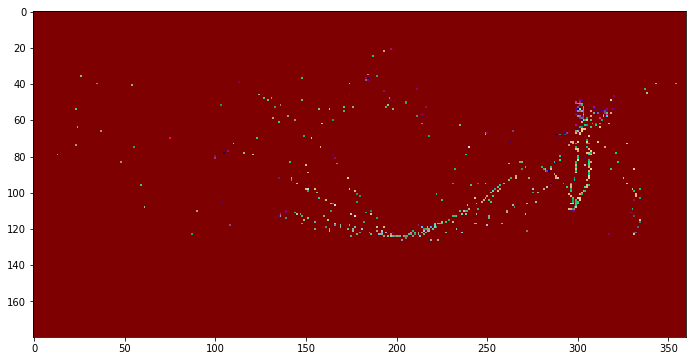

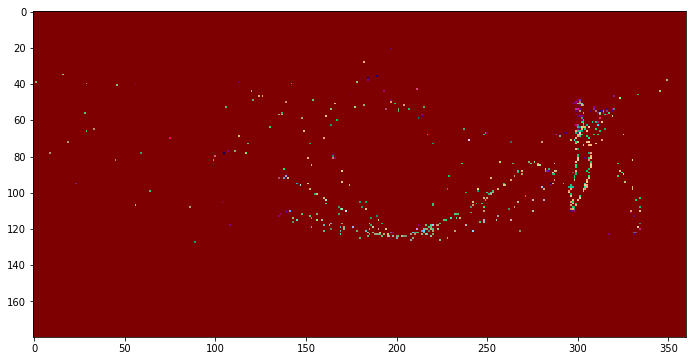

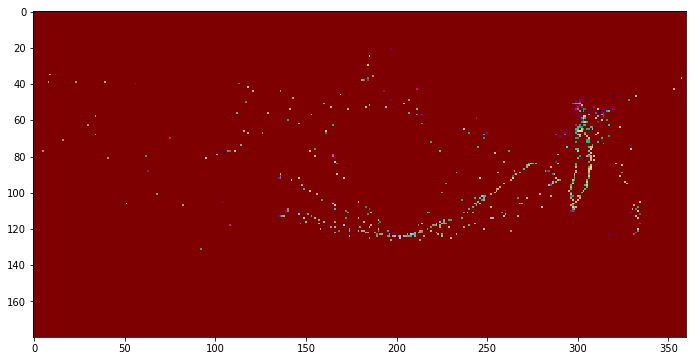

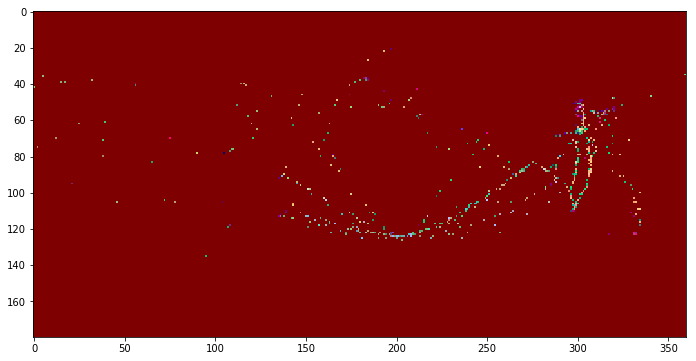

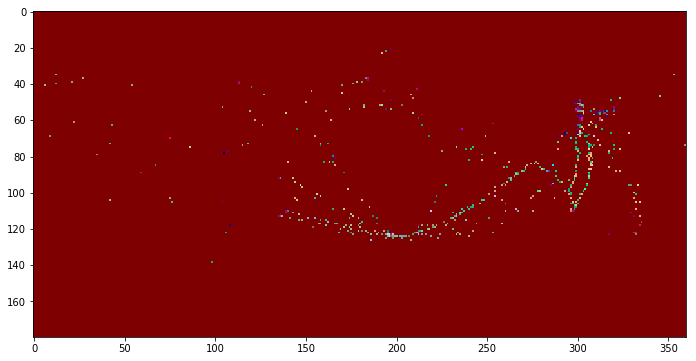

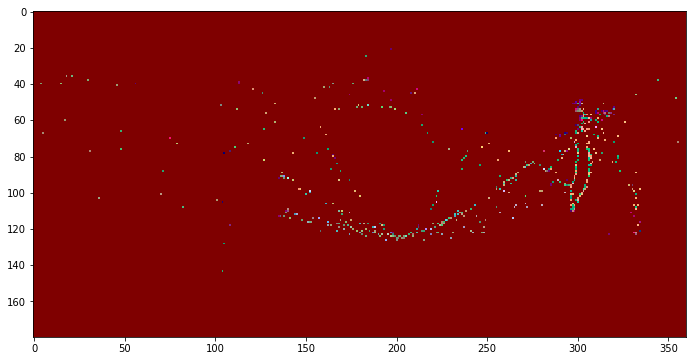

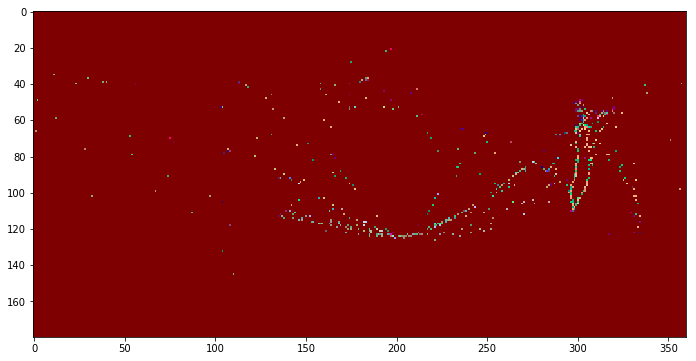

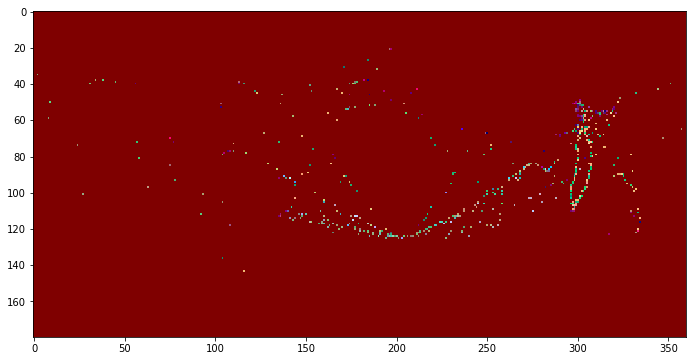

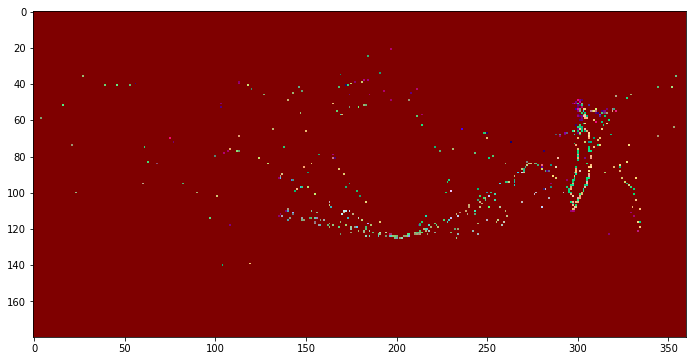

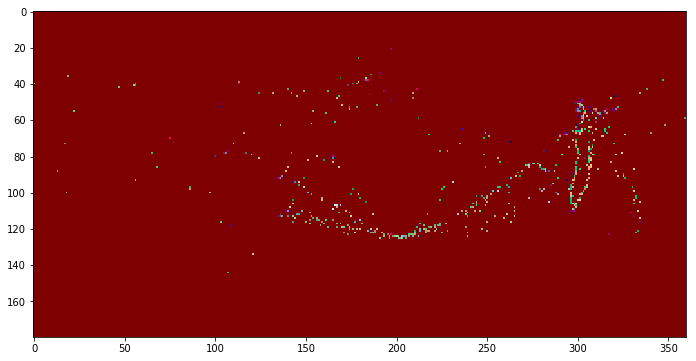

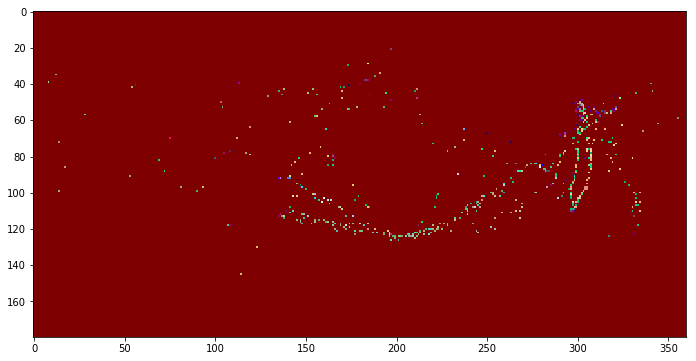

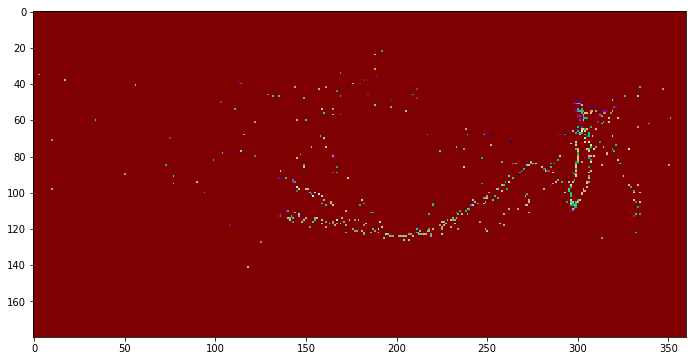

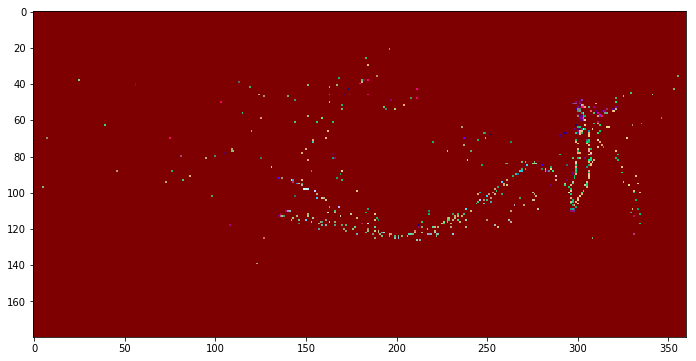

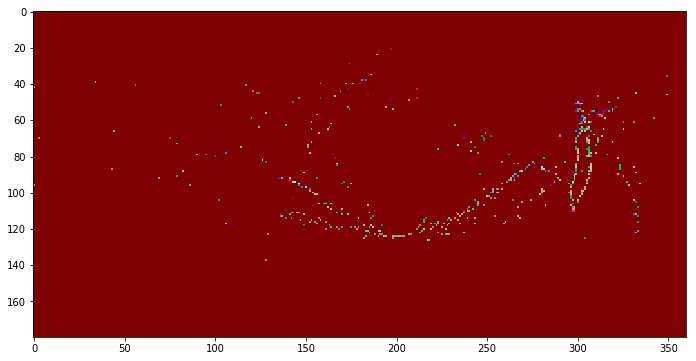

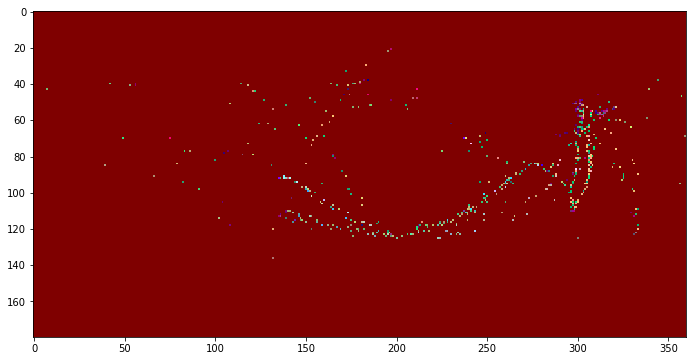

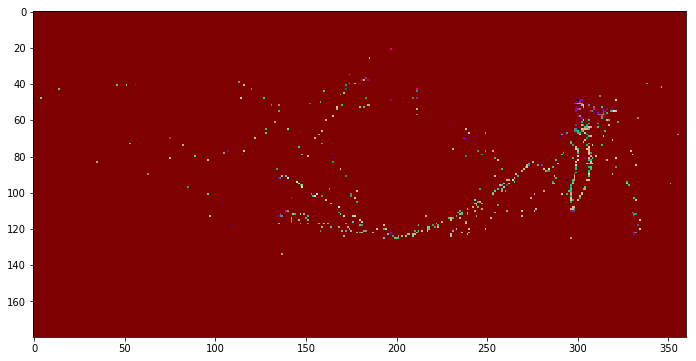

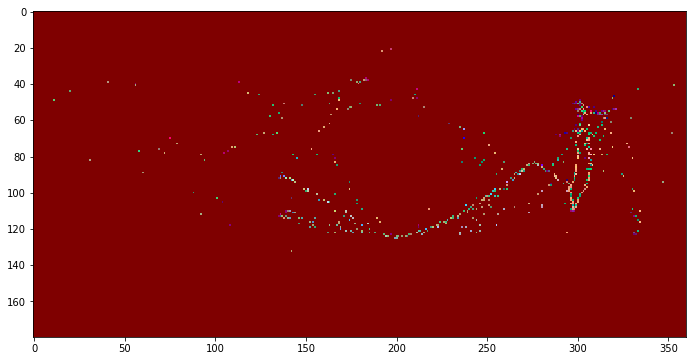

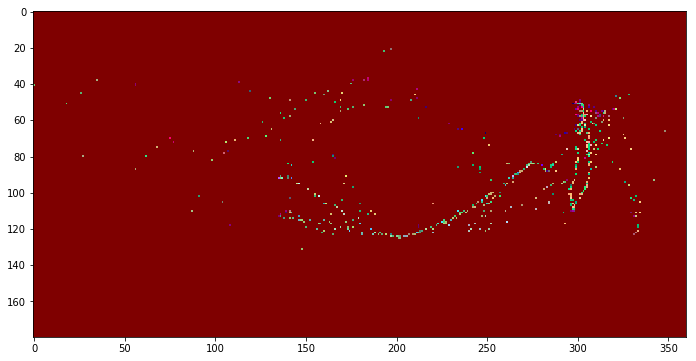

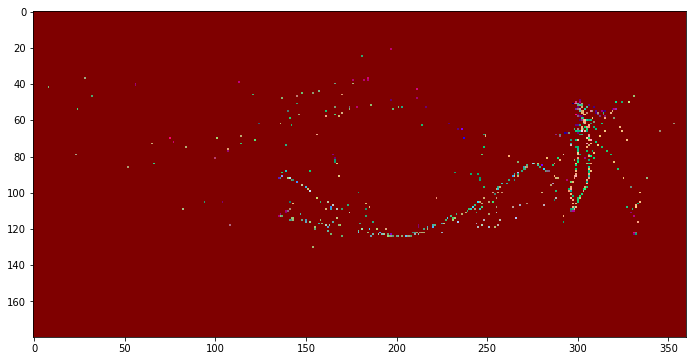

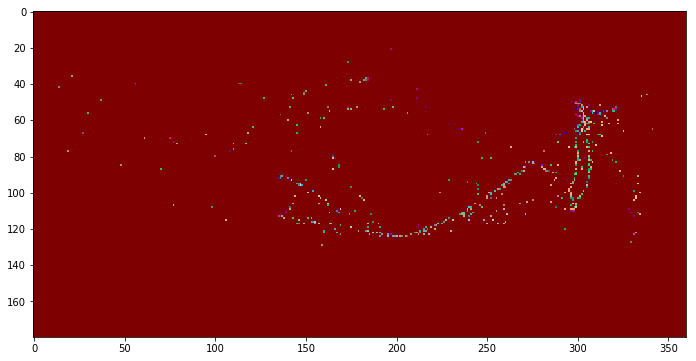

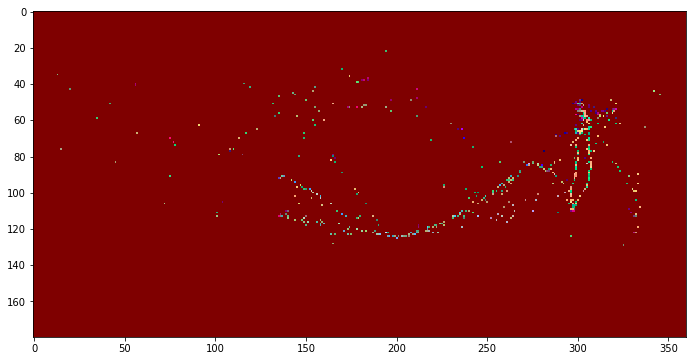

In [7]:
# key = np.random.choice(list(maps.keys()))
t = np.random.randint(len(maps.keys()))
for i in range(30):
    key = list(maps.keys())[t+i]
    print(key)
    img = maps[key][:,:,color].transpose([1,0,2])
    for k in range(3):
        img[:,:,k] -= img[:,:,k].min()
        img[:,:,k] /= img[:,:,k].max()
        img[:,:,k] *= 255
    img = np.uint(img)[::-1]
    path = "ais-map_"+key.replace('/', '-')+".png"
    plt.figure(figsize=(12,6)); plt.imshow(img); plt.savefig("img/"+path); plt.savefig("gif/"+str(i)+".png")

In [7]:
data = []

for key, value in maps.items():
    data.append(value)

data = np.array(data)
print(data.shape)

(960, 360, 180, 4)


In [8]:
np.save("ais_map.npy", data)